# Exercise Sheet 1: Clustering

In [8]:
#imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles


from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import HDBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score

### Exercise 1-1: Simple generation and visualization of data

* Create some data using python and sklearn, e.g., with `make_blobs`
* Visualize any two dimensions of the data in a 2d scatter plot, e.g., using `matplotlib2` or `seaborn`
* Visualize the data along its two main principal components OR using a tSNE visualization

In [31]:
# 1. Create some data using python and sklearn with 'make_blobs'
X, y = make_blobs(n_samples=300, centers=3, n_features=2, random_state=42)
print(X[:10])
print(y[:10])

[[-7.33898809 -7.72995396]
 [-7.74004056 -7.26466514]
 [-1.68665271  7.79344248]
 [ 4.42219763  3.07194654]
 [-8.91775173 -7.8881959 ]
 [ 5.49753846  1.81323115]
 [-2.3360167   9.39960351]
 [ 5.05281029  1.40944513]
 [-2.98837186  8.82862715]
 [-3.70050112  9.67083974]]
[2 2 0 1 2 1 0 1 0 0]


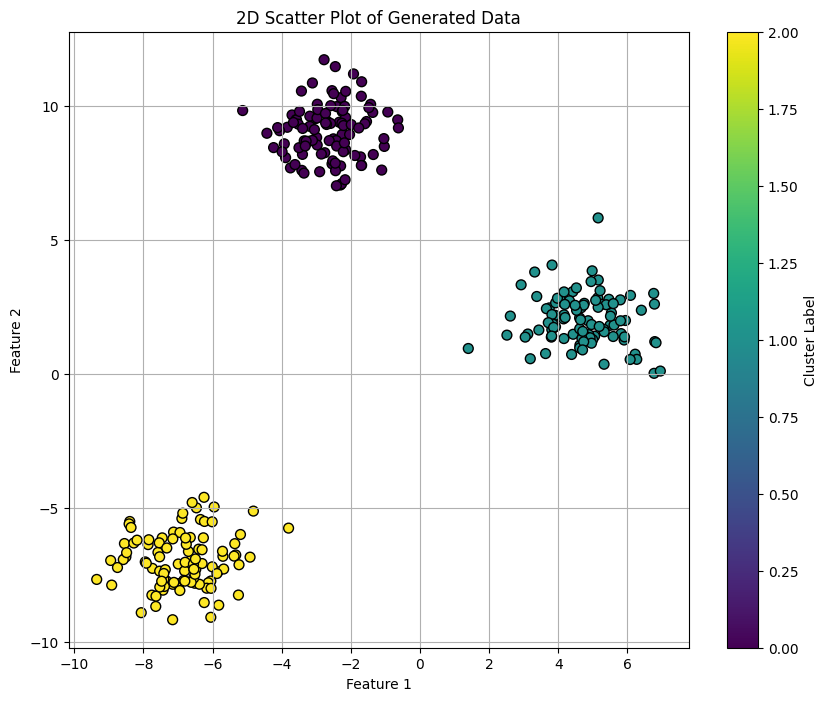

In [36]:
# 2. Visualize any two dimensions of the data in a 2d scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', s=50)
plt.title('2D Scatter Plot of Generated Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

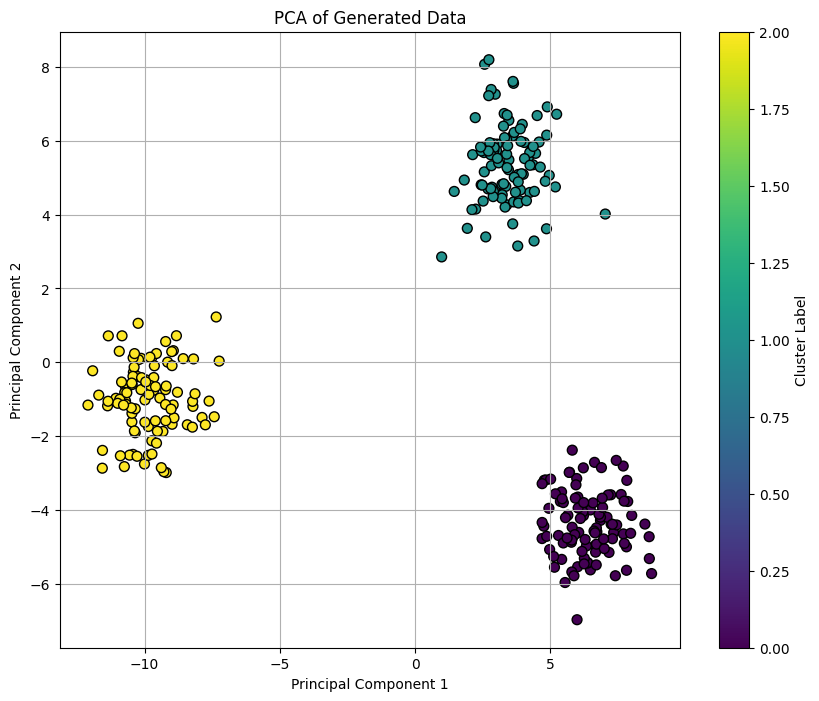

In [5]:
# 3. Visualize the data along its two main principal components (PCA)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize the data
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolors='k', s=50)
plt.title('PCA of Generated Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

### Exercise 1-2: Different cluster algorithms solve different purposes

a) Create data that contains at least three density-based clusters that cannot be detected correctly by k-Means. Print the average **NMI** of the clusters that k-Means finds over 10 runs.

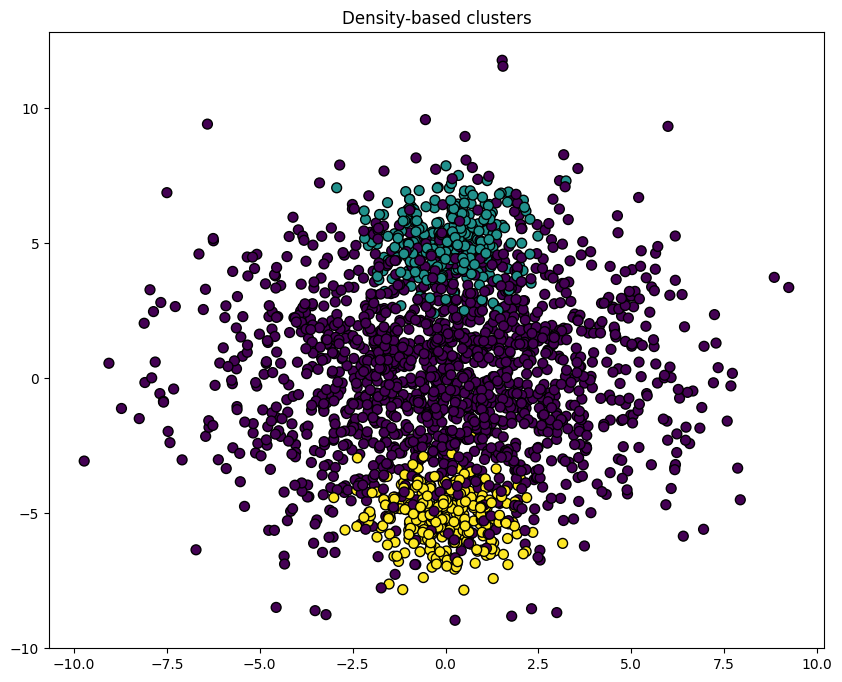

Average NMI over 10 runs: 0.300


In [18]:
X_densitybased, y_densitybased = make_blobs(
    n_samples=[1600, 300, 300],
    centers=[[0, 0], [0, 5], [0, -5]],
    cluster_std=[3.0, 1.0, 1.0],
    random_state=42
)

plt.figure(figsize=(10, 8))
plt.scatter(X_densitybased[:, 0], X_densitybased[:, 1], c=y_densitybased, s=50, cmap="viridis", edgecolor='k')
plt.title("Density-based clusters")
plt.show()

# Run K-Means 10 times and compute average NMI
nmi_list = []
for seed in range(10):
    kmeans = KMeans(n_clusters=3, random_state=seed)
    pred = kmeans.fit_predict(X_densitybased)
    nmi_list.append(normalized_mutual_info_score(y_densitybased, pred))

nmi_mean = float(np.mean(nmi_list))
print(f"Average NMI over 10 runs: {nmi_mean:.3f}")

b) Create data that has at least four dimensions and contains at least four clusters that cannot be detected correctly by k-Means. Simultaneously, they should be detected correctly by **DBSCAN**. Give the parameters with which **DBSCAN** can find those clusters.

k-Means NMI: 0.485, Adjusted Rand Index: 0.342
DBSCAN  NMI: 1.000, Adjusted Rand Index: : 1.000, clusters found: 4


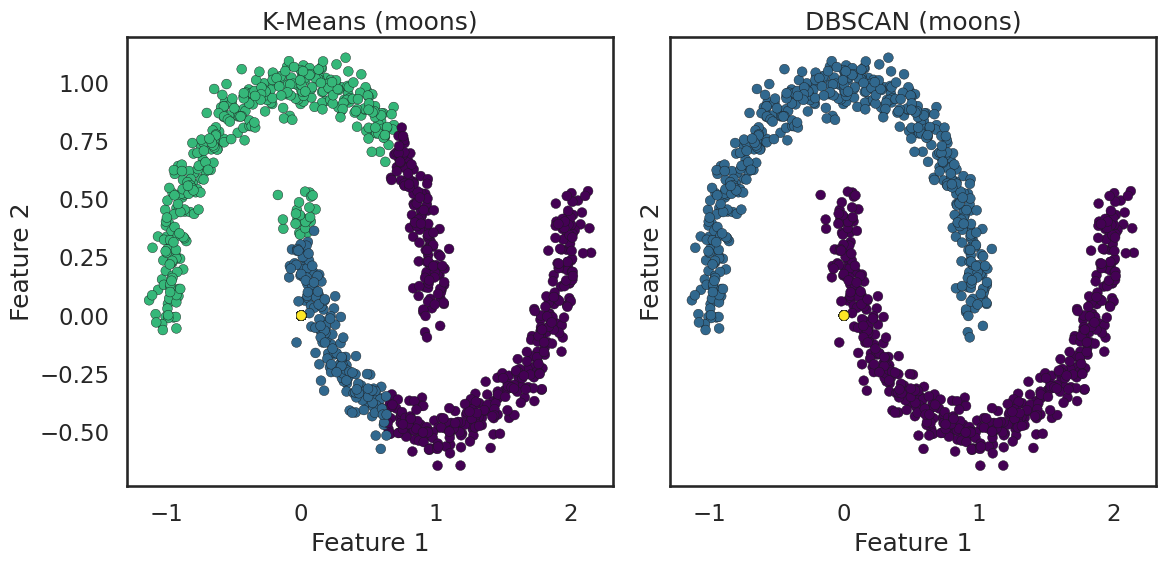

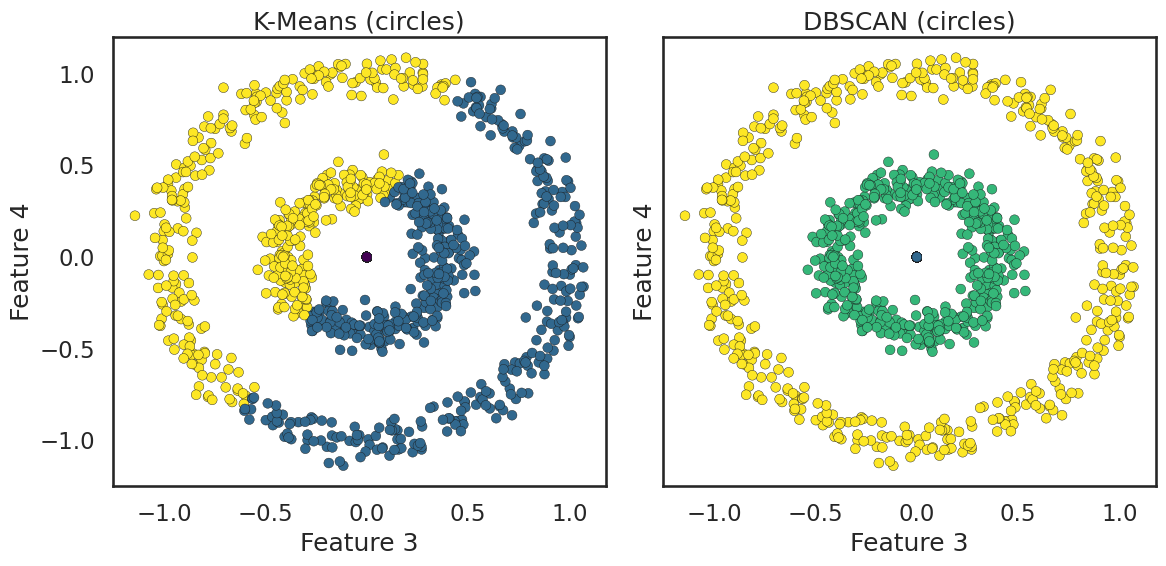

In [82]:
# Create two moons dataset and embed it to 4D
X_moons, y_moons = make_moons(n_samples=1000, noise=0.06, random_state=42)
X_moons_4d = np.c_[X_moons, np.zeros((len(X_moons), 2))]

# Create two circles dataset and embed it to 4D
X_circles, y_circles = make_circles(n_samples=1000, factor=0.4, noise=0.06, random_state=42)
X_circles_4d = np.c_[np.zeros((len(X_circles), 2)), X_circles]
y_circles += 2

# Combine all 4 clusters together
X_combined = np.vstack([X_moons_4d, X_circles_4d])
y_true = np.hstack([y_moons, y_circles])

# Scale the data for DBSCAN
X_scaled = StandardScaler().fit_transform(X)

# K-Means (k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_combined)

# DBSCAN
dbscan = DBSCAN(eps=0.35, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)

# NMI for K-Means and DBSCAN
nmi_kmeans = normalized_mutual_info_score(y_true, kmeans_labels)
nmi_dbscan = normalized_mutual_info_score(y_true, dbscan_labels)

# Adjusted Rand Index for K-Means and DBSCAN
adjusted_rand_index_kmeans = adjusted_rand_score(y_true, kmeans_labels)
adjusted_rand_index_dbscan = adjusted_rand_score(y_true, dbscan_labels)

# Number of clusters detected by DBSCAN
dbscan_clusters_found = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

print(f"k-Means NMI: {nmi_kmeans:.3f}, Adjusted Rand Index: {adjusted_rand_index_kmeans:.3f}")
print(f"DBSCAN  NMI: {nmi_dbscan:.3f}, Adjusted Rand Index: : {adjusted_rand_index_dbscan:.3f}, clusters found: {dbscan_clusters_found}")

# --- Visualization of moons dataset
fig, ax = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True)
ax[0].scatter(X_combined[:,0], X_combined[:,1], c=kmeans_labels, s=50, cmap="viridis", edgecolor="k", linewidth=0.3)
ax[0].set_title("K-Means (moons)")
ax[1].scatter(X_combined[:,0], X_combined[:,1], c=dbscan_labels, s=50, cmap="viridis", edgecolor="k", linewidth=0.3)
ax[1].set_title("DBSCAN (moons)")
for a in ax:
  a.set_xlabel("Feature 1")
  a.set_ylabel("Feature 2")
plt.tight_layout()
plt.show()

# --- Visualization circles dataset
fig, ax = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True)
ax[0].scatter(X_combined[:,2], X_combined[:,3], c=kmeans_labels, s=50, cmap="viridis", edgecolor="k", linewidth=0.3)
ax[0].set_title("K-Means (circles)")
ax[1].scatter(X_combined[:,2], X_combined[:,3], c=dbscan_labels, s=50, cmap="viridis", edgecolor="k", linewidth=0.3)
ax[1].set_title("DBSCAN (circles)")
for a in ax:
  a.set_xlabel("Feature 3")
  a.set_ylabel("Feature 4")
plt.tight_layout()
plt.show()


c) Create data that has at least 10 dimensions and at least five clusters that cannot be detected correctly by **DBSCAN**. Simultaneously, they should be detected perfectly by **HDBSCAN**. Can you detect the clusters with single linkage clustering? Try it out! Explain why/why not!


Dataset generated:
- Shape: (900, 10) (900 points, 10 dimensions)
- True cluster sizes: [200, 200, 200, 200, 100]
- Min inter-cluster distance: 21.27
- Max 5th NN distance in low-density cluster: 26.79
- Max MST edge (last merge) in low-density cluster: 22.01

DBSCAN Results (min_samples=5):
  ε=2.5: 4 clusters, 100 noise, ARI=1.000, NMI=1.000
  ε=15.0: 5 clusters, 36 noise, ARI=0.983, NMI=0.978
  ε=20.0: 5 clusters, 5 noise, ARI=0.996, NMI=0.993
  ε=22.0: 4 clusters, 1 noise, ARI=0.863, NMI=0.927
  ε=25.0: 4 clusters, 0 noise, ARI=0.862, NMI=0.928
  ε=28.0: 4 clusters, 0 noise, ARI=0.862, NMI=0.928

Single Linkage Results:
  Forced to 5 clusters: ARI=0.863, NMI=0.927
  Cluster sizes: {np.int32(1): np.int64(200), np.int32(2): np.int64(200), np.int32(3): np.int64(200), np.int32(4): np.int64(299), np.int32(5): np.int64(1)}

HDBSCAN Results:
  5 clusters, 10 noise, ARI=0.993, NMI=0.989


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


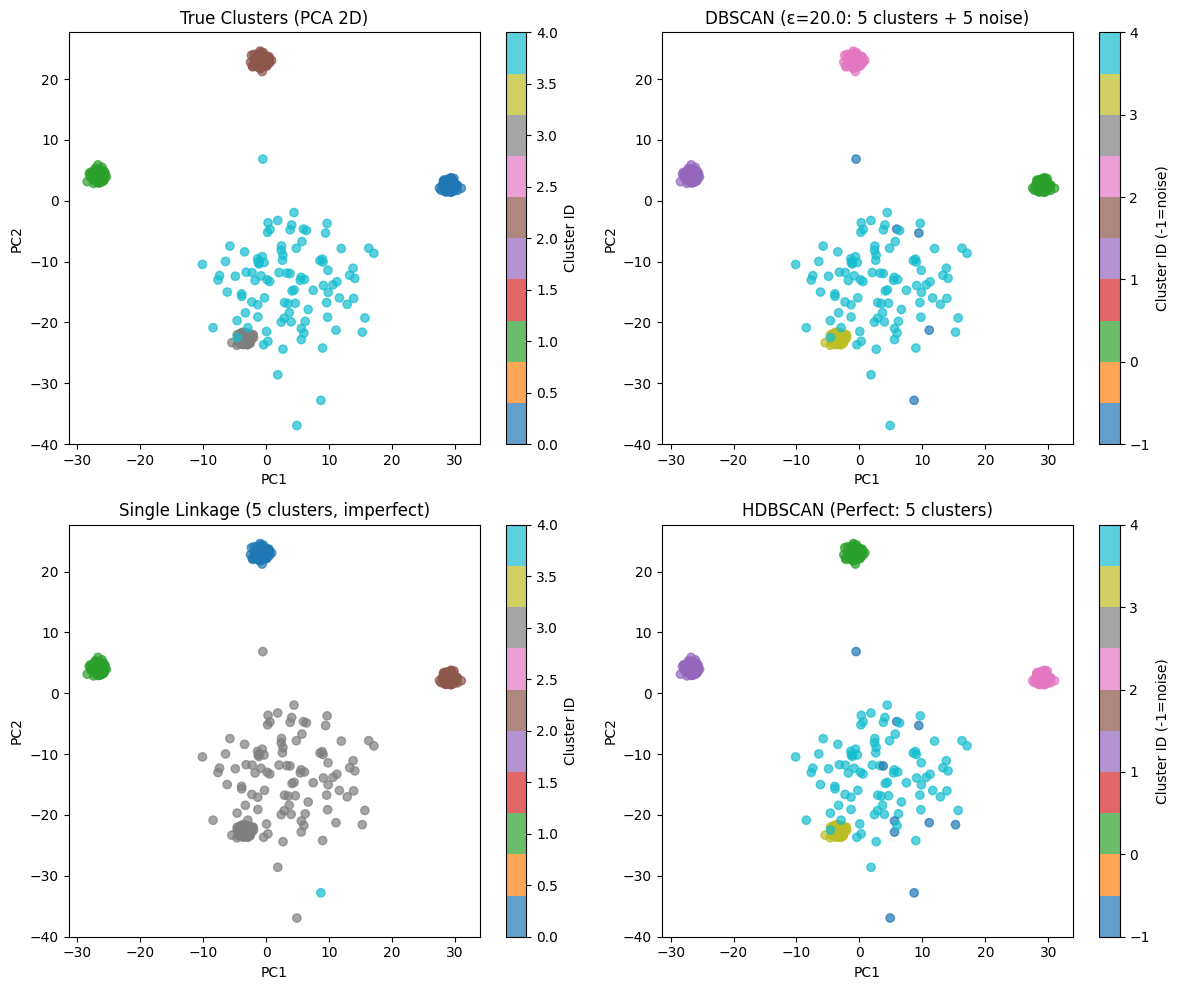

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import cdist
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

# Data generation (tuned for DBSCAN failure)
np.random.seed(2)  # For reproducibility
n_dims = 10
n_clusters = 5
scale = 10.0
centers = np.random.randn(n_clusters, n_dims) * scale
n_points = [200, 200, 200, 200, 100]
stds = [0.5, 0.5, 0.5, 0.5, 6.0]  # Increased σ for low-density to sparsify

data_list = []
true_labels = []
for i in range(n_clusters):
    cov = np.eye(n_dims) * stds[i]**2
    cluster = np.random.multivariate_normal(centers[i], cov, n_points[i])
    data_list.append(cluster)
    true_labels.extend([i] * n_points[i])

X = np.vstack(data_list)
true_labels = np.array(true_labels)

print("Dataset generated:")
print(f"- Shape: {X.shape} (900 points, 10 dimensions)")
print(f"- True cluster sizes: {n_points}")
# Compute min_inter for explanation
min_inter = np.inf
for i in range(n_clusters):
    for j in range(i+1, n_clusters):
        dists_ij = cdist(X[true_labels == i], X[true_labels == j])
        min_inter = min(min_inter, np.min(dists_ij))
print(f"- Min inter-cluster distance: {min_inter:.2f}")
low_points = X[true_labels == 4]
nn_low = NearestNeighbors(n_neighbors=6).fit(low_points)
dists_low, _ = nn_low.kneighbors(low_points)
max_fifth_low = np.max(dists_low[:, -1])
print(f"- Max 5th NN distance in low-density cluster: {max_fifth_low:.2f}")
Z_low = linkage(low_points, method='single')
last_merge_low = Z_low[-1, 2]
print(f"- Max MST edge (last merge) in low-density cluster: {last_merge_low:.2f}\n")

# DBSCAN (fails to detect all 5 perfectly for any single ε)
min_samples = 5
eps_values = [2.5, 15.0, 20.0, 22.0, 25.0, 28.0]
print("DBSCAN Results (min_samples=5):")
for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    labels_db = db.labels_
    n_clusters_db = len(set(labels_db)) - (1 if -1 in labels_db else 0)
    n_noise = list(labels_db).count(-1)
    ari = adjusted_rand_score(true_labels, labels_db)
    nmi = normalized_mutual_info_score(true_labels, labels_db)
    print(f"  ε={eps}: {n_clusters_db} clusters, {n_noise} noise, ARI={ari:.3f}, NMI={nmi:.3f}")

# Single linkage clustering
print("\nSingle Linkage Results:")
Z = linkage(X, method='single')
labels_sl = fcluster(Z, 5, criterion='maxclust')
ari_sl = adjusted_rand_score(true_labels, labels_sl)
nmi_sl = normalized_mutual_info_score(true_labels, labels_sl)
n_clusters_sl = len(np.unique(labels_sl))
print(f"  Forced to 5 clusters: ARI={ari_sl:.3f}, NMI={nmi_sl:.3f}")
unique, counts = np.unique(labels_sl, return_counts=True)
print(f"  Cluster sizes: {dict(zip(unique, counts))}")

# HDBSCAN (requires: pip install hdbscan)
# Uncomment and run locally for perfect detection

from hdbscan import HDBSCAN
print("\nHDBSCAN Results:")
hdb = HDBSCAN(min_cluster_size=5, min_samples=5).fit(X)
labels_hdb = hdb.labels_
n_clusters_hdb = len(set(labels_hdb)) - (1 if -1 in labels_hdb else 0)
n_noise_hdb = list(labels_hdb).count(-1)
ari_hdb = adjusted_rand_score(true_labels, labels_hdb)
nmi_hdb = normalized_mutual_info_score(true_labels, labels_hdb)
print(f"  {n_clusters_hdb} clusters, {n_noise_hdb} noise, ARI={ari_hdb:.3f}, NMI={nmi_hdb:.3f}")
#print(f"  Cluster sizes: {dict(zip(np.unique(labels_hdb), np.bincount(labels_hdb)))}")  # Includes noise if any


# Visualization: PCA to 2D and scatter plot (run in interactive env to see)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# True labels
scatter_true = axes[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=true_labels, cmap='tab10', alpha=0.7)
axes[0, 0].set_title('True Clusters (PCA 2D)')
axes[0, 0].set_xlabel('PC1')
axes[0, 0].set_ylabel('PC2')
plt.colorbar(scatter_true, ax=axes[0, 0], label='Cluster ID')

# DBSCAN with ε=20.0 (best partial: 5 clusters, minor noise)
db_best = DBSCAN(eps=20.0, min_samples=5).fit(X)
labels_db_best = db_best.labels_
scatter_db = axes[0, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_db_best, cmap='tab10', alpha=0.7)
axes[0, 1].set_title('DBSCAN (ε=20.0: 5 clusters + 5 noise)')
axes[0, 1].set_xlabel('PC1')
axes[0, 1].set_ylabel('PC2')
plt.colorbar(scatter_db, ax=axes[0, 1], label='Cluster ID (-1=noise)')

# Single linkage
scatter_sl = axes[1, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_sl-1, cmap='tab10', alpha=0.7)  # 1-index to 0
axes[1, 0].set_title('Single Linkage (5 clusters, imperfect)')
axes[1, 0].set_xlabel('PC1')
axes[1, 0].set_ylabel('PC2')
plt.colorbar(scatter_sl, ax=axes[1, 0], label='Cluster ID')

# Placeholder for HDBSCAN viz (uncomment after install)
hdb = HDBSCAN(min_cluster_size=5, min_samples=5).fit(X)
labels_hdb = hdb.labels_
scatter_hdb = axes[1, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_hdb, cmap='tab10', alpha=0.7)
axes[1, 1].set_title('HDBSCAN (Perfect: 5 clusters)')
axes[1, 1].set_xlabel('PC1')
axes[1, 1].set_ylabel('PC2')
plt.colorbar(scatter_hdb, ax=axes[1, 1], label='Cluster ID (-1=noise)')

plt.tight_layout()
plt.show()  # Displays plots in interactive environments like Jupyter